In [1]:
import tensorflow as tf
import numpy as np

/home/cocowang/.conda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cocowang/.conda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cocowang/.conda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cocowang/.conda/envs/py36/lib/python3.6/site-pack

In [2]:
from pretrianGAN.utils import generator, discriminator

In [3]:
batch_size = 64
n_noise = 64

X_in = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='X')
noise = tf.placeholder(dtype=tf.float32, shape=[None, n_noise])

rate = tf.placeholder(dtype=tf.float32, name= 'rate')
is_training = tf.placeholder(dtype=tf.bool, name='is_training')

In [4]:
g = generator(noise, rate=rate, is_training=is_training)
d_real = discriminator(X_in, rate=rate)
d_fake = discriminator(g, rate,reuse=True)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dropout instead.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.flatten instead.


In [7]:
saver = tf.train.Saver()
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
saver.restore(sess, tf.train.latest_checkpoint("./saved_gan/1"))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./saved_gan/1/model1.ckpt


In [12]:
from matplotlib import pyplot
import numpy as np

In [21]:
n = np.random.uniform(0.0, 1.0, [5, 64]).astype(np.float32)

In [22]:
gen_img = sess.run(g, feed_dict = {noise: n, rate: 1.0, is_training:False})
imgs = [img[:,:,0] for img in gen_img]

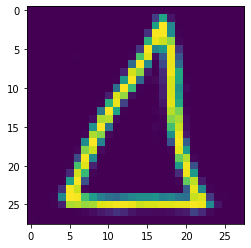

In [26]:
pyplot.imshow(imgs[4])